Q1. What is the difference between Ordinal Encoding and Label Encoding? Provide an example of when you
might choose one over the other.

In [1]:
## Ordinal Encoding is used when importance is given basis rank or order while Label encoding dont need any rank/order

In [2]:
## Eg. if there is column data Education with categorical values 
# 1.High School
# 2 Graduation
# 3. Post Graduation 

In [3]:
## In above case rank/order is important so we assign 
# High School -1
# Graduation -2
# Post Graduation -3 

# The above notaion use Label encoding

Q2. Explain how Target Guided Ordinal Encoding works and provide an example of when you might use it in
a machine learning project.

In [4]:
## Target Guided Ordinal Encoding 
## It is a technique used to encode categorical variables based on their relationship with the target variable. 
## This encoding technique is useful when we have a categorical variable with a large number of unique categories, 
## and we want to use this variable as a feature in our machine learning model

In [5]:
## for egample there are multiple stocks and their values at different dates then we can use Target Guided Ordinal Encoding to get the Mean Price

In [6]:
import pandas as pd

In [7]:
df=pd.DataFrame({"Stock":["Apple","Microsoft","Google","Amazon","Apple","Google"],'Day':['Monday','Monday','Tuesday','Monday','Wednesday','Thursday'],'Price':[2000,2500,5000,4000,2200,3800]})

In [8]:
df

,Stock,Day,Price
0,Apple,Monday,2000
1,Microsoft,Monday,2500
2,Google,Tuesday,5000
3,Amazon,Monday,4000
4,Apple,Wednesday,2200
5,Google,Thursday,3800


In [9]:
dict_new=df.groupby('Stock')['Price'].mean().to_dict()

In [10]:
dict_new

{'Amazon': 4000.0, 'Apple': 2100.0, 'Google': 4400.0, 'Microsoft': 2500.0}

In [11]:
df['stock_encoded']=df['Stock'].map(dict_new)

In [12]:
df

,Stock,Day,Price,stock_encoded
0,Apple,Monday,2000,2100.0
1,Microsoft,Monday,2500,2500.0
2,Google,Tuesday,5000,4400.0
3,Amazon,Monday,4000,4000.0
4,Apple,Wednesday,2200,2100.0
5,Google,Thursday,3800,4400.0


In [13]:
df[["Price",'stock_encoded']]

,Price,stock_encoded
0,2000,2100.0
1,2500,2500.0
2,5000,4400.0
3,4000,4000.0
4,2200,2100.0
5,3800,4400.0


Q3. Define covariance and explain why it is important in statistical analysis. How is covariance calculated?

In [14]:
## . Covariance is a measured use to determine how much variable change in randomly. The covariance is a product of the units of the two variables.

In [15]:
## If increase in one variable results in increase in other variable we say it is positive covriance , Decrease in other results in decrease of other.
## if increase in one results decrease in other then it is negative covariance

In [16]:
## It is important in statistical as Generally use the data science field for comparing data samples from different populations, 
## and covariance is used to determine how much two random variables to each other.

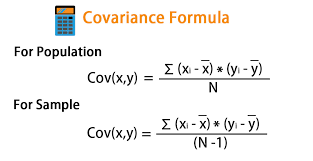

Q4. For a dataset with the following categorical variables: Color (red, green, blue), Size (small, medium,
large), and Material (wood, metal, plastic), perform label encoding using Python's scikit-learn library.
Show your code and explain the output.

In [17]:
df=pd.DataFrame({"Color":['red','green','blue'],"Size":['small','medium','large'],"Material":['wood','metal','plastic']})

In [18]:
df

,Color,Size,Material
0,red,small,wood
1,green,medium,metal
2,blue,large,plastic


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le=LabelEncoder()

In [21]:
df_new=df.apply(le.fit_transform)

In [22]:
df_new

,Color,Size,Material
0,2,2,2
1,1,1,0
2,0,0,1


Q5. Calculate the covariance matrix for the following variables in a dataset: Age, Income, and Education
level. Interpret the results.

In [23]:
df_qulaification=pd.DataFrame({"Age":[30,34,28,35,25,31],"Income":[50000,75000,40000,45000,25000,20000],'Education':['Graduate','Post Graduate','Graduate','College','Graduate','High School']})

In [24]:
df_qulaification

,Age,Income,Education
0,30,50000,Graduate
1,34,75000,Post Graduate
2,28,40000,Graduate
3,35,45000,College
4,25,25000,Graduate
5,31,20000,High School


In [25]:
from sklearn.preprocessing import OrdinalEncoder

In [26]:
encoder=OrdinalEncoder(categories=[['High School','College','Graduate','Post Graduate']])

In [27]:
edu_array=encoder.fit_transform(df_qulaification[['Education']])

In [28]:
df_qulaification['Education_encode']=pd.DataFrame(edu_array)

In [29]:
df_qulaification

,Age,Income,Education,Education_encode
0,30,50000,Graduate,2.0
1,34,75000,Post Graduate,3.0
2,28,40000,Graduate,2.0
3,35,45000,College,1.0
4,25,25000,Graduate,2.0
5,31,20000,High School,0.0


In [30]:
df_qulaification.cov()

/tmp/ipykernel_1652/131429276.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_qulaification.cov()


,Age,Income,Education_encode
Age,13.9,42500.0,-0.400000
Income,42500.0,387500000.0,15000.000000
Education_encode,-0.4,15000.0,1.066667


In [31]:
## We find that age and education is least covariance
## Income and age are highly covariance
## Income and Education has also High Covariance

Q6. You are working on a machine learning project with a dataset containing several categorical
variables, including "Gender" (Male/Female), "Education Level" (High School/Bachelor's/Master's/PhD),
and "Employment Status" (Unemployed/Part-Time/Full-Time). Which encoding method would you use for
each variable, and why?

In [32]:
## For Gender I will use Binary encoding (0 and 1) as only 2 values are there,
## Education Level : I wil use ordinal Encoding as it has order/rank - (High School-1/Bachelor's-2/Master's-3/PhD-4)
## Employement Status: I will use  one hot encoding  as they are not in any rank/order(Unemployed-'1 0 0'/Part-Time-'0 1 0'/Full-Time-'0 0 1')

Q7. You are analyzing a dataset with two continuous variables, "Temperature" and "Humidity", and two
categorical variables, "Weather Condition" (Sunny/Cloudy/Rainy) and "Wind Direction" (North/South/
East/West). Calculate the covariance between each pair of variables and interpret the results.

In [33]:
df_weather=pd.DataFrame({"Temperature":[26,25,28,30,27,26],"Humidity":[41,50,61,70,23,35],"Weather Condition":['sunny','rainy','cloudy','rainy','sunny','cloudy'],"Wind Direction":['south','north','south','east','west','east']})

In [34]:
df_weather

,Temperature,Humidity,Weather Condition,Wind Direction
0,26,41,sunny,south
1,25,50,rainy,north
2,28,61,cloudy,south
3,30,70,rainy,east
4,27,23,sunny,west
5,26,35,cloudy,east


In [35]:
df_weather.cov()

/tmp/ipykernel_1652/2177171377.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_weather.cov()


,Temperature,Humidity
Temperature,3.2,19.000000
Humidity,19.0,297.866667


In [36]:
# convert categories to numeric

In [37]:
df_weather['Weather Condition']=df_weather[['Weather Condition']].apply(le.fit_transform)

In [38]:
df_weather[['Wind Direction']]=df_weather[['Wind Direction']].apply(le.fit_transform)

In [39]:
df_weather

,Temperature,Humidity,Weather Condition,Wind Direction
0,26,41,2,2
1,25,50,1,1
2,28,61,0,2
3,30,70,1,0
4,27,23,2,3
5,26,35,0,0


In [40]:
df_weather.cov()

,Temperature,Humidity,Weather Condition,Wind Direction
Temperature,3.2,19.000000,-0.2,-0.400000
Humidity,19.0,297.866667,-6.4,-10.066667
Weather Condition,-0.2,-6.400000,0.8,0.600000
Wind Direction,-0.4,-10.066667,0.6,1.466667


In [41]:
## Temperature and Humidity are high postively Covariance

In [42]:
## Temperature and Weather Condition has least -ve covariance 

In [43]:
## Temperature and Wind direction has less -ve covariancE

In [44]:
## Humidity and Weather Condition has -ve covar

In [45]:
# Humidity and Wind Direction has -ve Covariance

In [46]:
## Wind direction and Weather Conditon is positive covariance